In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from os import chdir
from sklearn.decomposition import PCA
sns.set()
chdir('/Users/albertwakhloo/Desktop/models/neuromatch/steinmetz')
#import statsmodels

In [54]:
data_fname1 = 'steinmetz_NMA_part1.npz'
data_fname2 = 'steinmetz_NMA_part2.npz'
alldat = np.load('steinmetz_NMA_part1.npz', allow_pickle=True)['dat']
alldat = np.hstack((alldat, np.load('steinmetz_NMA_part2.npz', allow_pickle=True)['dat']))

dat = alldat[11]

In [3]:
print('Brain areas: ' + str(np.unique(dat['brain_area'])))
print('Brain regions: ' + str(dat.keys())) 
dat['spks'].shape

Brain areas: ['ACA' 'CA1' 'DG' 'LGd' 'LH' 'MD' 'MOs' 'PL' 'SUB' 'VISam' 'VISp' 'root']
Brain regions: dict_keys(['spks', 'wheel', 'pupil', 'lfp', 'response', 'response_time', 'bin_size', 'stim_onset', 'contrast_right', 'contrast_left', 'brain_area', 'brain_area_lfp'])


(697, 340, 250)

In [4]:
regions = ["vis ctx", "thal", "hipp", "other ctx", "other"]
brain_groups = [["VISa", "VISam", "VISl", "VISp", "VISpm", "VISrl"], # visual cortex
                ["CL", "LD", "LGd", "LH", "LP", "MD", "MG", "PO", "POL", "PT", "RT", "SPF", "TH", "VAL", "VPL", "VPM"], # thalamus
                ["CA", "CA1", "CA2", "CA3", "DG", "SUB", "POST"], # hippocampal
                ["ACA", "AUD", "COA", "DP", "ILA", "MOp", "MOs", "OLF", "ORB", "ORBm", "PIR", "PL", "SSp", "SSs", "RSP"," TT"], # non-visual cortex
               ]

NN = len(dat['brain_area']) # number of neurons
barea = len(brain_groups) * np.ones(NN, ) # last one is "other"
for j in range(len(brain_groups)):
    barea[np.isin(dat['brain_area'], brain_groups[j])] = j # assign a number of each region to each neuron
    #can be used to pull out neurons wrt larger region

dim spikes = neurons x trial x time bin

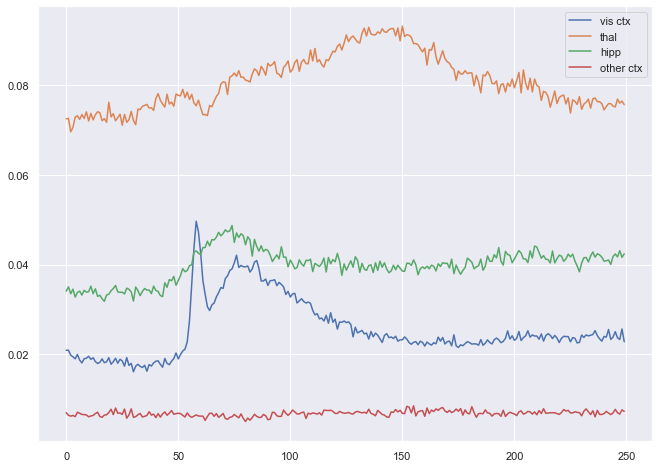

In [17]:
_, ax = plt.subplots(figsize = (11,8)) 
for j in range(len(brain_groups)) : 
    #print((dat[dat['spks'][barea == j]]))
    ax.plot(dat['spks'][barea == j].mean(axis = (0, 1)), label = regions[j])# average over neurons in region and trials 
ax.legend()
plt.show()

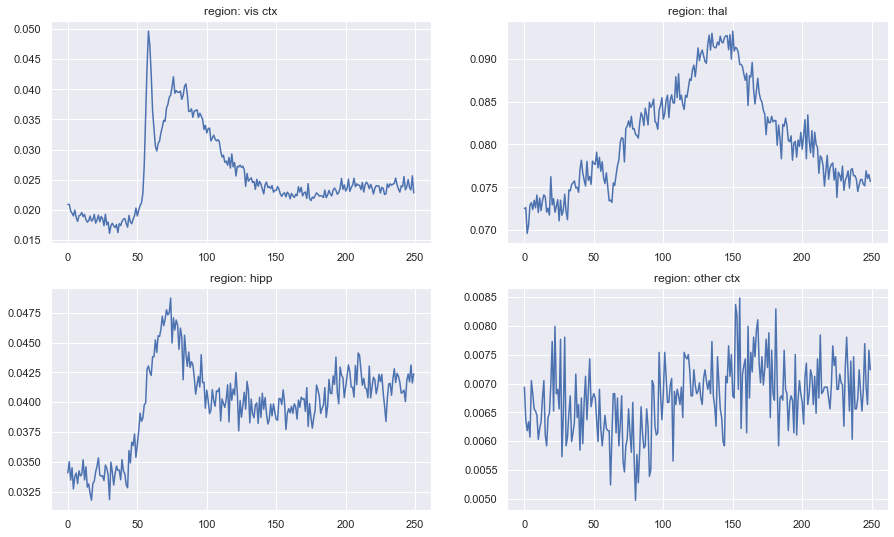

In [16]:
_, ax = plt.subplots(2, int(len(brain_groups)/2), figsize = (15,9)) 
for j, a in zip(range(len(brain_groups)), ax.flat) : 
    #print((dat[dat['spks'][barea == j]]))
    a.plot(dat['spks'][barea == j].mean(axis = (0, 1)))
    a.set_title(f'region: {regions[j]}') # average over neurons in region and trials 
plt.show()

In [7]:
np.unique(dat['bin_size'])
vis_left = dat['contrast_left']
vis_right = dat['contrast_right']

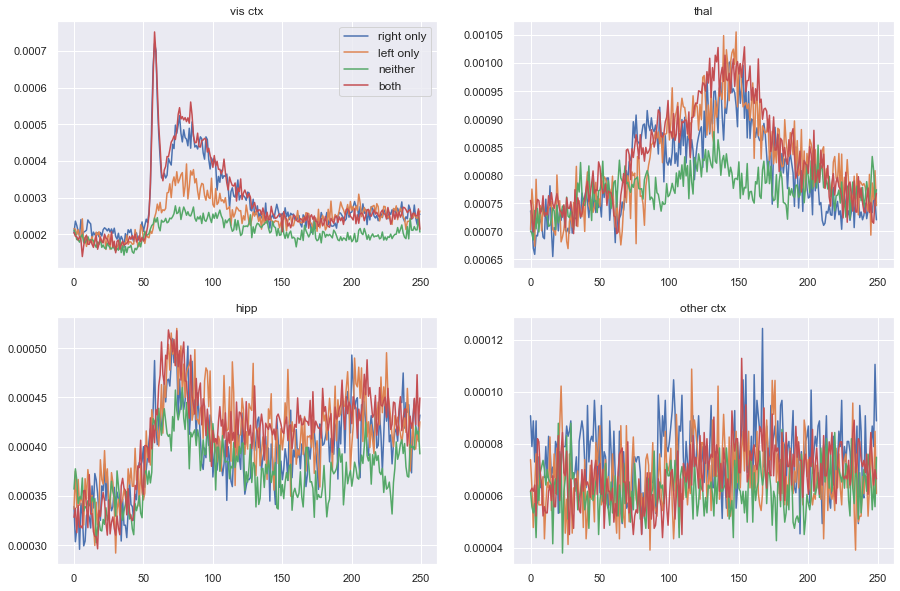

In [15]:
_, ax = plt.subplots(2, int(len(brain_groups)/2), figsize = (15,10)) 
dt = 1/0.01
for j, a in zip(range(len(brain_groups)), ax.flat) : 
    a.plot(1/dt *  dat['spks'][barea==j][:,np.logical_and(vis_left==0, vis_right>0)].mean(axis=(0,1)))
    a.plot(1/dt *  dat['spks'][barea==j][:,np.logical_and(vis_left>0 , vis_right==0)].mean(axis=(0,1)))
    a.plot(1/dt *  dat['spks'][barea==j][:,np.logical_and(vis_left==0 , vis_right==0)].mean(axis=(0,1)))
    a.plot(1/dt *  dat['spks'][barea==j][:,np.logical_and(vis_left>0, vis_right>0)].mean(axis=(0,1)))  
    #a.text(.25, .92, 'n=%d'%np.sum(barea==j))#, transform=ax.transAxes)
    a.set_title(regions[j])
ax[0, 0].legend(['right only', 'left only', 'neither', 'both'], fontsize=12)

In [9]:
spikes = dat['spks']
time_mu = np.mean(spikes, axis = 1) #time averaged neural response within stimulus

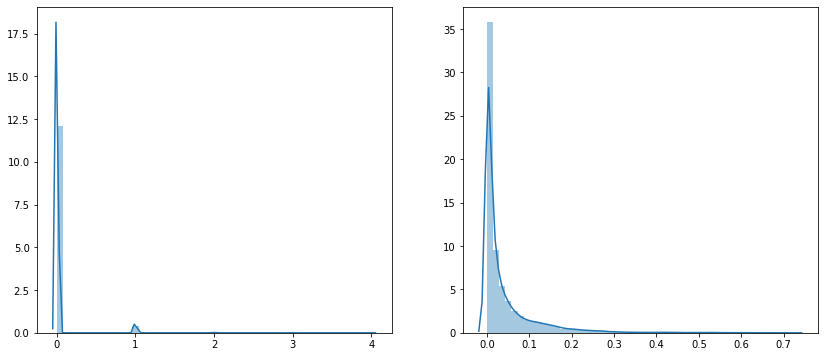

In [10]:
_, ax = plt.subplots(1,2, figsize = (14, 6))
sns.distplot(spikes[:, 0], ax = ax[0])
sns.distplot(time_mu, ax = ax[1])
plt.show()

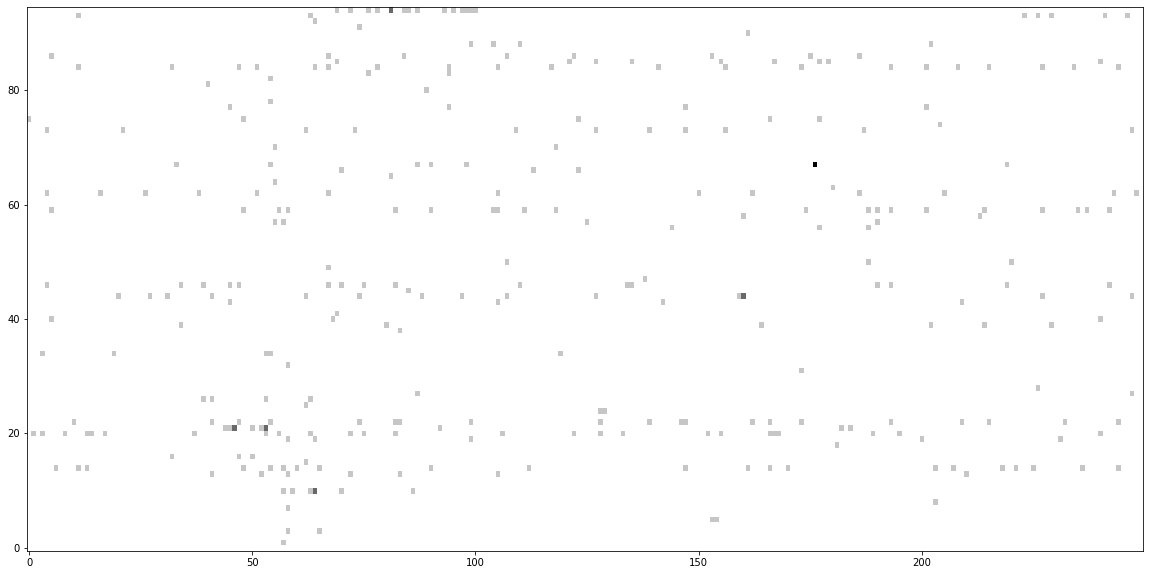

In [11]:
plt.figure(figsize = (20, 10))
Ooo = spikes[5:100, 90, :]
plt.imshow(Ooo, cmap = 'Greys', aspect = 'auto', origin = 'lower')#, lineoffsets = offsets)
plt.show()

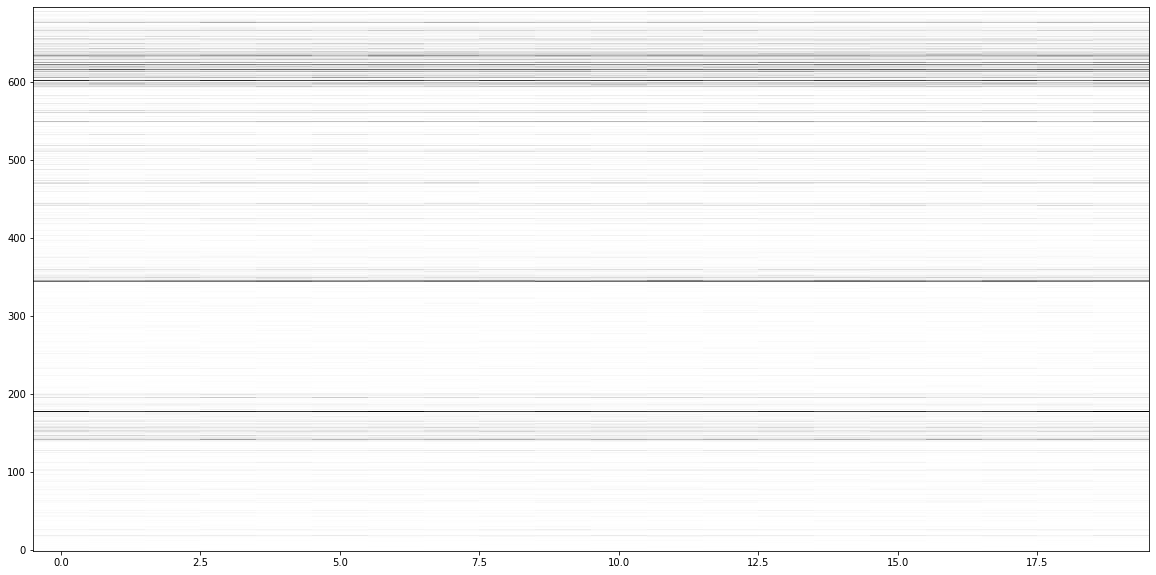

In [12]:
def raster(neuronxtime) : 
    return plt.imshow(neuronxtime, cmap = 'Greys', aspect = 'auto', origin = 'lower')
plt.figure(figsize = (20, 10))
raster(time_mu[:, 0:20])
#plt.xlim((0, 0.5))
plt.show()

In [118]:
subset = spikes[:, 0:60].reshape((spikes.shape[0], -1)) #flatten over trls 
pca = PCA(n_components = 3)
fit = pca.fit(subset)

In [119]:
print(fit.explained_variance_)

[79.79771959  9.55284554  8.60995608]


In [120]:
fit.singular_values_

array([235.6675897 ,  81.54005456,  77.41142958])

In [121]:
fit_region = pca.fit_transform(subset.T)

In [122]:
pca.components_


array([[ 1.38349544e-03,  8.89434307e-04,  2.74090238e-02, ...,
         4.76486714e-04,  3.62446348e-04,  2.92562857e-02],
       [ 5.43810194e-03,  3.76832493e-04, -7.16861705e-03, ...,
         1.43204251e-04,  9.24558277e-04, -1.33144524e-04],
       [-5.00689863e-03, -5.25974427e-04, -3.40275526e-02, ...,
        -1.16877929e-05,  5.39822915e-04, -8.63105593e-02]])

In [123]:
weights = np.unique(barea)
#calculate weights for first component from each region
pc1w = pca.components_[0]
for i in range(len(weights)) : 
    weights[i] = np.sum(pc1w[barea == i])
weights2 = np.unique(barea)
#calculate weights for first component from each region
pc2w = pca.components_[1]
for i in range(len(weights)) : 
    weights2[i] = np.sum(pc2w[barea == i])
weights3 = np.unique(barea)
#calculate weights for first component from each region
pc3w = pca.components_[2]
for i in range(len(weights)) : 
    weights3[i] = np.sum(pc3w[barea == i])
#weights4 = np.unique(barea)
#calculate weights for first component from each region
#pc4w = pca.components_[3]
#for i in range(len(weights)) : 
 #   weights4[i] = np.sum(pc4w[barea == i])

In [124]:
wts = [weights, weights2, weights3]#, weights4]

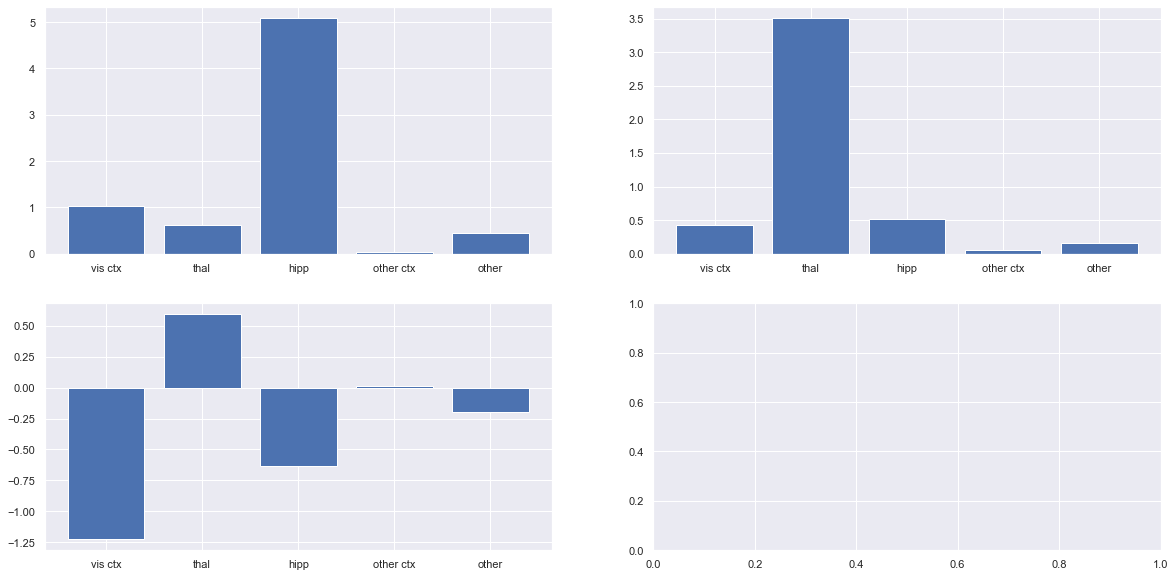

In [125]:
_, ax = plt.subplots(2, 2, figsize= (20, 10))
for w, a in zip(wts, ax.flat) : 
    a.bar(regions, w)
plt.show()

<BarContainer object of 697 artists>

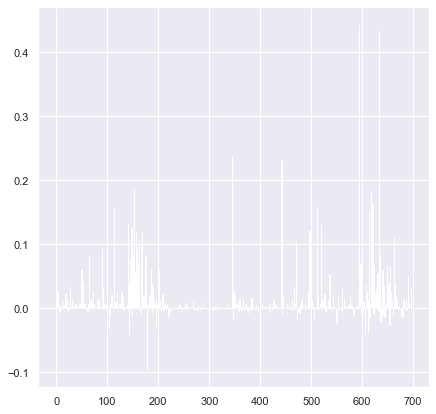

In [77]:
plt.figure(figsize = (7,7))
plt.bar(np.arange(697), pca.components_[0], color = 'black')

In [63]:
df = pd.DataFrame(fit_region, columns = [f'pc{i}' for i in range(1, 6)])

In [64]:
df # each column  represents activity in some set of neurons 

,pc1,pc2,pc3,pc4,pc5
0,-0.773203,-0.900486,-0.535995,0.186064,-0.296129
1,0.142379,0.196571,0.286220,0.057189,0.747291
2,-0.633688,-0.387988,0.336870,-0.102679,-0.282763
3,-1.003475,-0.899448,-0.524340,0.105730,0.059724
4,-1.166795,-0.530232,0.004892,0.102592,1.020473
...,...,...,...,...,...
14995,0.426750,-0.218504,0.897091,-0.287578,-0.226070
14996,0.191949,-0.707694,0.655133,0.185022,-0.235659
14997,0.656998,1.074796,1.099625,0.121356,0.383293
14998,-0.420352,-0.075111,0.799689,-0.236731,-0.365519


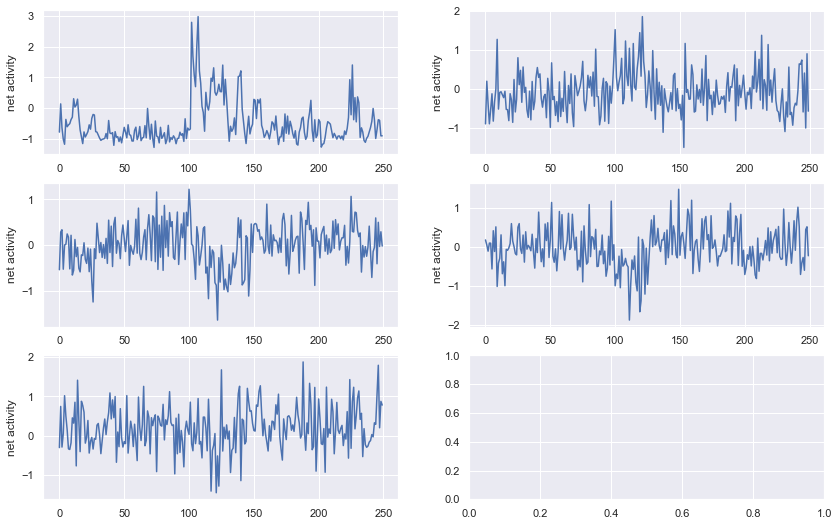

In [65]:
_, axs = plt.subplots(3, 2, figsize = (14 ,9))
for (i, dat), ax in zip(df.iteritems(), axs.flatten()) : 
    ax.plot(dat[0:250])
    ax.set_ylabel('net activity')

In [ ]:
pc_area_label = 

In [49]:
br = np.zeros(dat.shape[0])
c = 0
for j in subset.shape[0] : 
    barea[c]

array([0., 0., 0., 2., 0., 2., 2., 0., 0., 2., 2., 0., 0., 2., 0., 0., 0.,
       2., 2., 2., 0., 2., 0., 0., 0., 2., 0., 2., 2., 2., 2., 2., 2., 2.,
       0., 0., 2., 0., 2., 2., 0., 2., 2., 2., 1., 2., 0., 0., 2., 2., 0.,
       2., 2., 2., 0., 2., 2., 0., 0., 2., 0., 1., 0., 2., 2., 2., 2., 2.,
       2., 0., 1., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2.,
       2., 2., 0., 0., 2., 2., 2., 0., 2., 0., 2., 2., 2., 2., 0., 2., 2.,
       2., 2., 2., 0., 2., 2., 0., 0., 2., 2., 2., 2., 2., 2., 2., 0., 2.,
       0., 0., 0., 0., 2., 2., 2., 2., 0., 0., 1., 2., 2., 0., 2., 0., 0.,
       0., 1., 2., 2., 0., 2., 2., 2., 2., 2., 2., 2., 2., 0., 2., 2., 2.,
       1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       1., 2., 0., 2., 2., 2., 2., 1., 2., 0., 0., 1., 0., 0., 2., 2., 2.,
       2., 2., 0., 2., 2., 0., 2., 0., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 0., 2., 2., 2., 0., 2., 2., 0., 0., 2., 2., 2., 2., 0., 2.,
       0., 0., 3., 4., 3.

In [66]:
barea

array([0., 0., 0., 2., 0., 2., 2., 0., 0., 2., 2., 0., 0., 2., 0., 0., 0.,
       2., 2., 2., 0., 2., 0., 0., 0., 2., 0., 2., 2., 2., 2., 2., 2., 2.,
       0., 0., 2., 0., 2., 2., 0., 2., 2., 2., 1., 2., 0., 0., 2., 2., 0.,
       2., 2., 2., 0., 2., 2., 0., 0., 2., 0., 1., 0., 2., 2., 2., 2., 2.,
       2., 0., 1., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2.,
       2., 2., 0., 0., 2., 2., 2., 0., 2., 0., 2., 2., 2., 2., 0., 2., 2.,
       2., 2., 2., 0., 2., 2., 0., 0., 2., 2., 2., 2., 2., 2., 2., 0., 2.,
       0., 0., 0., 0., 2., 2., 2., 2., 0., 0., 1., 2., 2., 0., 2., 0., 0.,
       0., 1., 2., 2., 0., 2., 2., 2., 2., 2., 2., 2., 2., 0., 2., 2., 2.,
       1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       1., 2., 0., 2., 2., 2., 2., 1., 2., 0., 0., 1., 0., 0., 2., 2., 2.,
       2., 2., 0., 2., 2., 0., 2., 0., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 0., 2., 2., 2., 0., 2., 2., 0., 0., 2., 2., 2., 2., 0., 2.,
       0., 0., 3., 4., 3.